In [2]:

from pymongo.mongo_client import MongoClient
from pymongo.server_api import ServerApi

uri = "mongodb+srv://<username>:<password>@cluster0.mongodb.net/"

# Create a new client and connect to the server
client = MongoClient(uri, server_api=ServerApi('1'))

# Send a ping to confirm a successful connection
try:
    client.admin.command('ping')
    print("Pinged your deployment. You successfully connected to MongoDB!")
except Exception as e:
    print(e)

Pinged your deployment. You successfully connected to MongoDB!


In [3]:
client.list_database_names()

['db1',
 'db2',
 'sample_analytics',
 'sample_geospatial',
 'sample_guides',
 'sample_mflix',
 'sample_restaurants',
 'sample_supplies',
 'sample_training',
 'sample_weatherdata',
 'sampledb',
 'sampleex',
 'youtube_data',
 'youtube_db',
 'admin',
 'local']

In [4]:
db = client["airbnb"]
coll = db["sample_airbnb"]

In [5]:
client.list_database_names()

['db1',
 'db2',
 'sample_analytics',
 'sample_geospatial',
 'sample_guides',
 'sample_mflix',
 'sample_restaurants',
 'sample_supplies',
 'sample_training',
 'sample_weatherdata',
 'sampledb',
 'sampleex',
 'youtube_data',
 'youtube_db',
 'admin',
 'local']

In [38]:
import pandas as pd
import numpy as np

In [15]:
from pymongo import MongoClient
from pymongo.server_api import ServerApi

import json

# MongoDB connection string
connection_string = ""mongodb+srv://<username>:<password>@cluster0.mongodb.net/"
client = MongoClient(connection_string)



In [ ]:
# Database and collection
db = client['airbnb']
collection = db['sample_airbnb']

# Load JSON file
with open('sample_airbnb.json', 'r') as file:
    data = json.load(file)

# Insert data into the collection
if isinstance(data, list):
    collection.insert_many(data)  # For an array of JSON objects
else:
    collection.insert_one(data)  # For a single JSON object

print("Data successfully uploaded!")


In [34]:
client.list_database_names()

['airbnb',
 'db1',
 'db2',
 'sample_analytics',
 'sample_geospatial',
 'sample_guides',
 'sample_mflix',
 'sample_restaurants',
 'sample_supplies',
 'sample_training',
 'sample_weatherdata',
 'sampledb',
 'sampleex',
 'youtube_data',
 'youtube_db',
 'admin',
 'local']

In [40]:
dataset = []
for i in collection.find():
    data1 = dict(Id = i['_id'],
                Listing_url = i['listing_url'],
                Name = i.get('name'),
                Description = i['description'],
                House_rules = i.get('house_rules'),
                Property_type = i['property_type'],
                Room_type = i['room_type'],
                Bed_type = i['bed_type'],
                Min_nights = int(i['minimum_nights']),
                Max_nights = int(i['maximum_nights']),
                Cancellation_policy = i['cancellation_policy'],
                Accomodates = i['accommodates'],
                Total_bedrooms = i.get('bedrooms'),
                Total_beds = i.get('beds'),
                Availability_365 = i['availability']['availability_365'],
                Price = i['price'],
                Security_deposit = i.get('security_deposit'),
                Cleaning_fee = i.get('cleaning_fee'),
                Extra_people = i['extra_people'],
                Guests_included= i['guests_included'],
                No_of_reviews = i['number_of_reviews'],
                Review_scores = i['review_scores'].get('review_scores_rating'),
                Amenities = ', '.join(i['amenities']),
                Host_id = i['host']['host_id'],
                Host_name = i['host']['host_name'],
                Street = i['address']['street'],
                Country = i['address']['country'],
                Country_code = i['address']['country_code'],
                Location_type = i['address']['location']['type'],
                Longitude = i['address']['location']['coordinates'][0],
                Latitude = i['address']['location']['coordinates'][1],
                Is_location_exact = i['address']['location']['is_location_exact']
    )
    dataset.append(data1)

In [48]:
df = pd.DataFrame(dataset)
df

,Id,Listing_url,Name,Description,House_rules,Property_type,Room_type,Bed_type,Min_nights,Max_nights,...,Amenities,Host_id,Host_name,Street,Country,Country_code,Location_type,Longitude,Latitude,Is_location_exact
0,1003530,https://www.airbnb.com/rooms/1003530,New York City - Upper West Side Apt,"Murphy bed, optional second bedroom available....",No smoking is permitted in the apartment. All ...,Apartment,Private room,Real Bed,12,360,...,"Internet, Wifi, Air conditioning, Kitchen, Ele...",454250,Greta,"New York, NY, United States",United States,US,Point,-73.965230,40.799620,False
1,10133554,https://www.airbnb.com/rooms/10133554,Double and triple rooms Blue mosque,We are on the central city Blue mosque 5 minu...,,Bed and breakfast,Private room,Real Bed,1,1125,...,"Internet, Wifi, Air conditioning, Free parking...",52004703,Mehmet Emin,"Fatih , İstanbul, Turkey",Turkey,TR,Point,28.980090,41.006200,False
2,10059872,https://www.airbnb.com/rooms/10059872,"Soho Cozy, Spacious and Convenient","Clean, fully furnish, Spacious 1 bedroom flat ...",,Apartment,Entire home/apt,Real Bed,4,20,...,"Air conditioning, Kitchen, Smoking allowed, Do...",51624384,Giovanni,"Hong Kong, Hong Kong Island, Hong Kong",Hong Kong,HK,Point,114.150270,22.281580,True
3,10084023,https://www.airbnb.com/rooms/10084023,City center private room with bed,House is located 5mins walk from Sham Shui Po ...,"1. 禁止吸煙, 只限女生入住 (除得到批准) No smoking and only fe...",Guesthouse,Private room,Futon,1,500,...,"TV, Wifi, Air conditioning, Kitchen, Elevator,...",51744313,Yi,"Hong Kong , 九龍, Hong Kong",Hong Kong,HK,Point,114.166900,22.331400,True
4,10091713,https://www.airbnb.com/rooms/10091713,Surry Hills Studio - Your Perfect Base in Sydney,"This spacious, light filled studio has everyth...","No smoking: No smoking any substance, includi...",Apartment,Entire home/apt,Real Bed,10,21,...,"TV, Wifi, Kitchen, Elevator, Heating, Washer, ...",13764143,Ben,"Surry Hills, NSW, Australia",Australia,AU,Point,151.215540,-33.880290,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5550,9985696,https://www.airbnb.com/rooms/9985696,Kadıköy-Altıyol,Kadıköy merkezde 2+1 dairem vardır.Çok kalabal...,,House,Entire home/apt,Real Bed,1,1125,...,"TV, Cable TV, Internet, Wifi, Kitchen, Buzzer/...",51303748,Eren,"Kadıköy, İstanbul, Turkey",Turkey,TR,Point,29.030790,40.985630,False
5551,9993190,https://www.airbnb.com/rooms/9993190,Just Steps from the Ocean at Premier Platinum ...,Relax Hawaiian Style in Gated Community on Oce...,"As a guest of Coconut Condos, I agree to the f...",Townhouse,Entire home/apt,Real Bed,3,365,...,"TV, Wifi, Air conditioning, Pool, Kitchen, Fre...",51013381,Coconut Condos,"Lahaina, HI, United States",United States,US,Point,-156.667520,20.858940,False
5552,9887054,https://www.airbnb.com/rooms/9887054,Quarry Bay fully furnished studio C,Newly renovated studio flat with full furniture.,,Apartment,Private room,Real Bed,3,1125,...,"TV, Wifi, Air conditioning, Kitchen, Elevator,...",31386255,Cat,"Hong Kong, Hong Kong Island, Hong Kong",Hong Kong,HK,Point,114.207220,22.291570,False
5553,9907907,https://www.airbnb.com/rooms/9907907,Large double room in Bondi,A bright large double room is available in a b...,We like to keep the flat clean and tidy so wou...,Apartment,Private room,Real Bed,3,1125,...,"TV, Internet, Wifi, Kitchen, Washer, Dryer, Sm...",47615848,Lucy,"Bondi Beach, NSW, Australia",Australia,AU,Point,151.265420,-33.892980,False


In [49]:
df.shape

(5555, 32)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   5555 non-null   object 
 1   Listing_url          5555 non-null   object 
 2   Name                 5555 non-null   object 
 3   Description          5555 non-null   object 
 4   House_rules          5555 non-null   object 
 5   Property_type        5555 non-null   object 
 6   Room_type            5555 non-null   object 
 7   Bed_type             5555 non-null   object 
 8   Min_nights           5555 non-null   int64  
 9   Max_nights           5555 non-null   int64  
 10  Cancellation_policy  5555 non-null   object 
 11  Accomodates          5555 non-null   int64  
 12  Total_bedrooms       5550 non-null   float64
 13  Total_beds           5542 non-null   float64
 14  Availability_365     5555 non-null   int64  
 15  Price                5555 non-null   f

In [51]:
df.dtypes

Id                      object
Listing_url             object
Name                    object
Description             object
House_rules             object
Property_type           object
Room_type               object
Bed_type                object
Min_nights               int64
Max_nights               int64
Cancellation_policy     object
Accomodates              int64
Total_bedrooms         float64
Total_beds             float64
Availability_365         int64
Price                  float64
Security_deposit       float64
Cleaning_fee           float64
Extra_people           float64
Guests_included        float64
No_of_reviews            int64
Review_scores          float64
Amenities               object
Host_id                 object
Host_name               object
Street                  object
Country                 object
Country_code            object
Location_type           object
Longitude              float64
Latitude               float64
Is_location_exact         bool
dtype: o

In [52]:
df.isnull().sum()

Id                        0
Listing_url               0
Name                      0
Description               0
House_rules               0
Property_type             0
Room_type                 0
Bed_type                  0
Min_nights                0
Max_nights                0
Cancellation_policy       0
Accomodates               0
Total_bedrooms            5
Total_beds               13
Availability_365          0
Price                     0
Security_deposit       2084
Cleaning_fee           1531
Extra_people              0
Guests_included           0
No_of_reviews             0
Review_scores          1474
Amenities                 0
Host_id                   0
Host_name                 0
Street                    0
Country                   0
Country_code              0
Location_type             0
Longitude                 0
Latitude                  0
Is_location_exact         0
dtype: int64

In [53]:
# The below features are in Decimal128 type hence changing it to relevant data types
df.Price = df.Price.astype(str).astype(float)
df.Security_deposit = df.Security_deposit[~df.Security_deposit.isna()].astype(str).astype(float)
df.Cleaning_fee = df.Cleaning_fee[~df.Cleaning_fee.isna()].astype(str).astype(float)
df.Extra_people = df.Extra_people.astype(str).astype(float)
df.Guests_included = df.Guests_included.astype(str).astype(float)
df.Review_scores = df.Review_scores.astype('Int64')

In [54]:
# Filling Total bedrooms with mode
df.Total_bedrooms.fillna(df.Total_bedrooms.mode()[0],inplace=True)
# Filling Total beds with median because data has outliers
df.Total_beds.fillna(df.Total_beds.median(),inplace=True)
df.Security_deposit.fillna(df.Security_deposit.median(),inplace=True)
df.Cleaning_fee.fillna(df.Cleaning_fee.median(),inplace=True)
df.Review_scores.fillna(df.Review_scores.median(),inplace=True)

In [55]:
# Filling Empty values in Description and House rules columns
df.Description.replace(to_replace='',value='No Description available',inplace=True)
df.House_rules.replace(to_replace='',value='No rules available',inplace=True)
df.Amenities.replace(to_replace='',value='Not available',inplace=True)

In [56]:
df.isna().sum()

Id                     0
Listing_url            0
Name                   0
Description            0
House_rules            0
Property_type          0
Room_type              0
Bed_type               0
Min_nights             0
Max_nights             0
Cancellation_policy    0
Accomodates            0
Total_bedrooms         0
Total_beds             0
Availability_365       0
Price                  0
Security_deposit       0
Cleaning_fee           0
Extra_people           0
Guests_included        0
No_of_reviews          0
Review_scores          0
Amenities              0
Host_id                0
Host_name              0
Street                 0
Country                0
Country_code           0
Location_type          0
Longitude              0
Latitude               0
Is_location_exact      0
dtype: int64

In [57]:
df[df.duplicated()]

,Id,Listing_url,Name,Description,House_rules,Property_type,Room_type,Bed_type,Min_nights,Max_nights,...,Amenities,Host_id,Host_name,Street,Country,Country_code,Location_type,Longitude,Latitude,Is_location_exact


In [59]:
duplicates = df[df.Name.duplicated(keep=False)]
print(duplicates)

            Id                            Listing_url  \
63    10359729  https://www.airbnb.com/rooms/10359729   
169   11012484  https://www.airbnb.com/rooms/11012484   
212   11194788  https://www.airbnb.com/rooms/11194788   
239   11566403  https://www.airbnb.com/rooms/11566403   
287   11792238  https://www.airbnb.com/rooms/11792238   
569   13389577  https://www.airbnb.com/rooms/13389577   
1166  16210632  https://www.airbnb.com/rooms/16210632   
1822  19430825  https://www.airbnb.com/rooms/19430825   
3227  26563602  https://www.airbnb.com/rooms/26563602   
3236  26556751  https://www.airbnb.com/rooms/26556751   
3278   2682827   https://www.airbnb.com/rooms/2682827   
3295  26739925  https://www.airbnb.com/rooms/26739925   
3303  27082981  https://www.airbnb.com/rooms/27082981   
3495  28221594  https://www.airbnb.com/rooms/28221594   
3605  29224880  https://www.airbnb.com/rooms/29224880   
3755  29324861  https://www.airbnb.com/rooms/29324861   
3798  29848645  https://www.air

In [60]:
# Name Column has empty values and some duplicates hence dropping them
df.drop(labels=list(df[df.Name.duplicated(keep=False)].index),inplace=True)

In [61]:
df.reset_index(drop=True,inplace=True)

In [62]:
# Converting dataframe to csv file and saving it
df.to_csv('Airbnb_data.csv',index=False)

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Top 10 Property Types available')

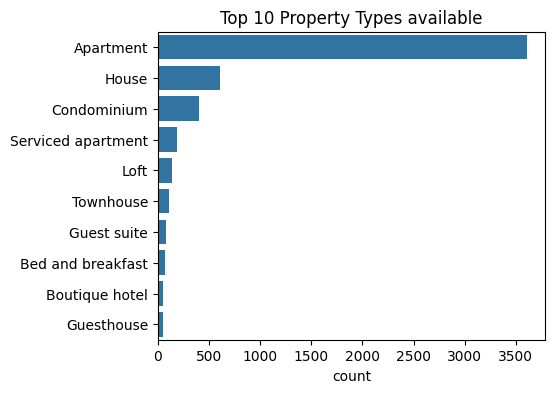

In [68]:
plt.figure(figsize=(5,4))
ax = sns.countplot(data=df,y=df.Property_type.values,order=df.Property_type.value_counts().index[:10])
ax.set_title("Top 10 Property Types available")

Text(0.5, 1.0, 'Total Listings in each Room Type')

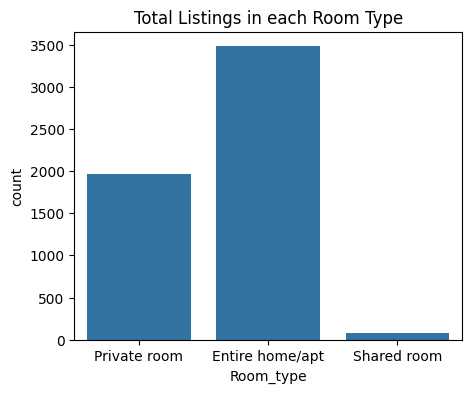

In [67]:
plt.figure(figsize=(5,4))
ax = sns.countplot(data=df,x=df.Room_type)
ax.set_title("Total Listings in each Room Type")

In [69]:
# top 10 Hosts with Highest number of listings
df.Host_name.value_counts()

Maria      37
David      26
Ana        21
Sarah      20
Jov        18
           ..
Stefan      1
Shan        1
Yonette     1
Eya         1
Aliane      1
Name: Host_name, Length: 3134, dtype: int64

Text(0.5, 1.0, 'Top 10 Hosts with Highest number of Listings')

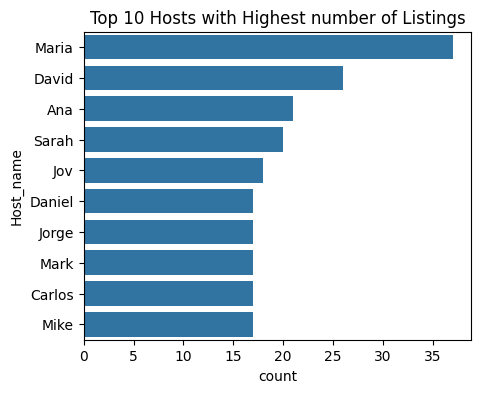

In [70]:
plt.figure(figsize=(5,4))
ax = sns.countplot(data=df,y=df.Host_name,order=df.Host_name.value_counts().index[:10])
ax.set_title("Top 10 Hosts with Highest number of Listings")

In [89]:
import plotly.express as px
fig = px.choropleth(data_frame=df,
                    locations='Country_code',
                    color='Country',
                    locationmode='country names')
fig.show()

In [78]:
rev_df = df.groupby('Room_type', as_index=False)['Review_scores'].mean().sort_values(by='Review_scores')
rev_df

,Room_type,Review_scores
2,Shared room,92.578313
1,Private room,93.28252
0,Entire home/apt,93.853652


In [79]:

fig = px.bar(data_frame=rev_df,x='Room_type',y='Review_scores',color='Review_scores')
fig.show()

In [80]:
price_df = df.groupby('Room_type',as_index=False)['Price'].mean().sort_values(by='Price')
price_df

,Room_type,Price
1,Private room,212.640244
0,Entire home/apt,315.115584
2,Shared room,349.590361


In [81]:

fig = px.bar(data_frame=price_df,x='Room_type',y='Price',color='Price')
fig.show()

In [83]:
country_df = df.groupby('Country',as_index=False)['Price'].mean()
country_df

,Country,Price
0,Australia,197.806557
1,Brazil,525.801653
2,Canada,100.047988
3,China,405.368421
4,Hong Kong,773.525084
5,Portugal,69.501818
6,Spain,101.007924
7,Turkey,371.198462
8,United States,185.696721


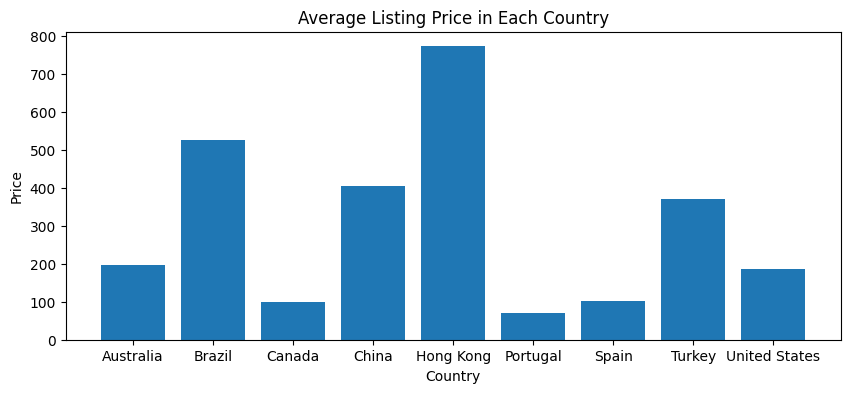

In [85]:
country_names = country_df['Country']
prices = country_df['Price']

# Create a scatter plot
plt.figure(figsize=(10,4))
plt.bar(country_names, prices)
plt.title('Average Listing Price in Each Country')
plt.xlabel('Country')
plt.ylabel('Price')
#plt.xticks(rotation=45)
plt.show()